<a href="https://colab.research.google.com/github/poojanmehta/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/house_price_train.csv')
data = df.copy(deep=True)

81

In [ ]:
data.head(10)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:

null_vals = data.isnull().any()
print(null_vals)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [ ]:
# Function to find columns with correlation more than threshold between them

def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Drop target feature

y = data['SalePrice']
data.drop(['SalePrice'], axis=1, inplace=True)

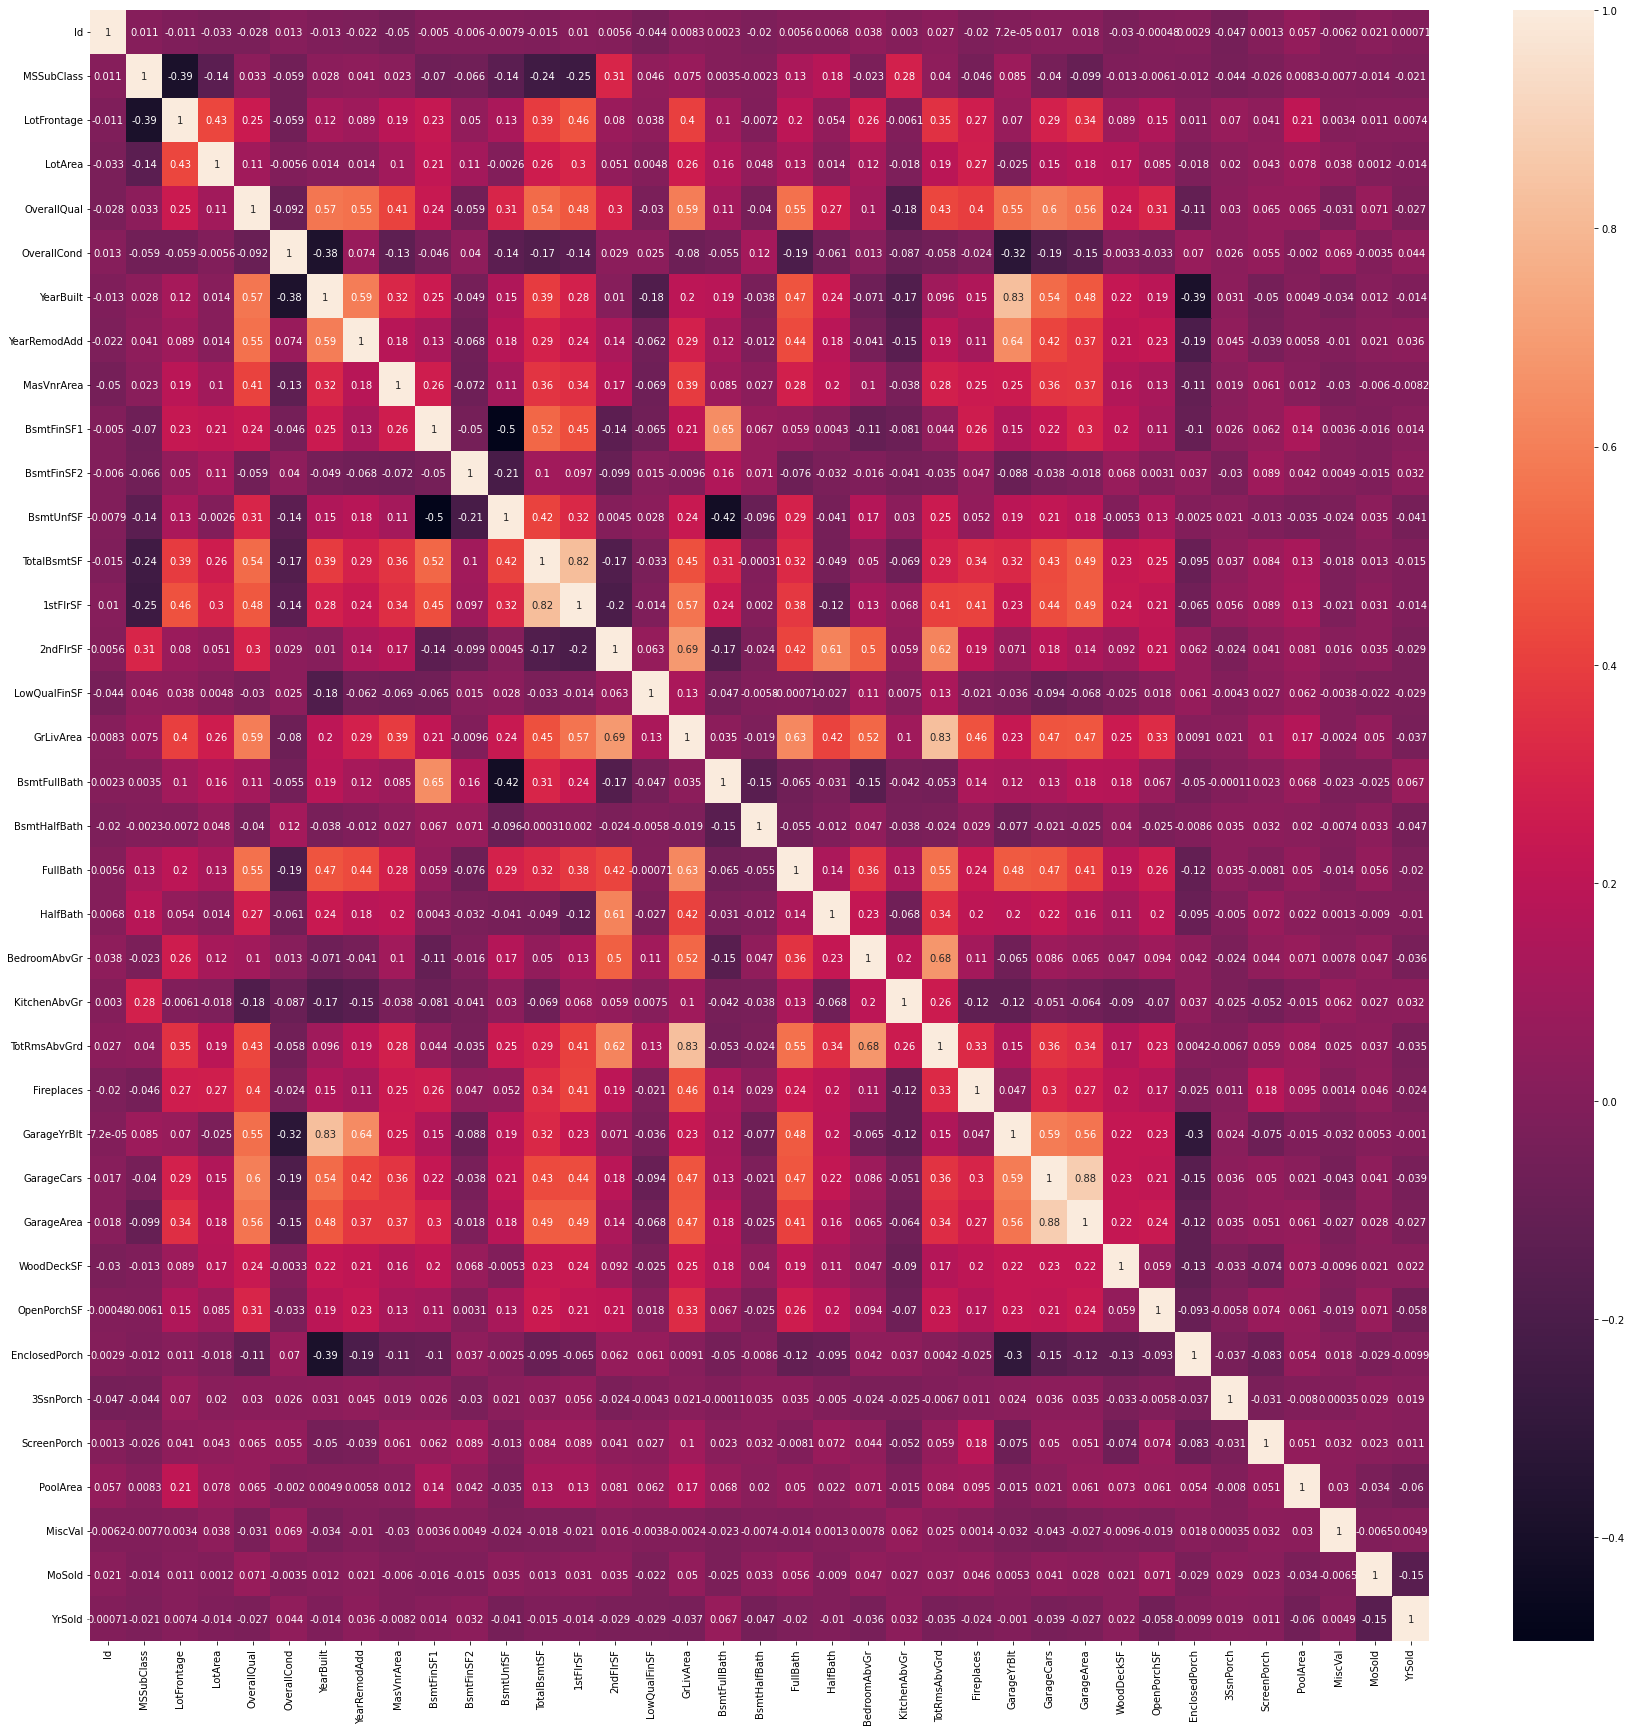

Features Before:  81
Features to be removed:  {'GarageArea'}
Features After :  37


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Take numerical features out
numerical_columns = data.select_dtypes(exclude=['object'])

# Plot Heatmap for correlation between all columns
plt.figure(figsize=(30,30))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

# Fill null columns with mean for all numerical features
numerical_columns.isnull().sum()
numerical_columns.fillna(numerical_columns.mean(), inplace=True)

print('Numerical Features Before: ', len(numerical_columns.columns))

# Using the function that we defined above
numerical_corr_features = correlation(numerical_columns, 0.85)

print('Features to be removed: ', numerical_corr_features)
print('Numerical Features After : ', len(numerical_columns.columns))

# Drop the columns that correlation() funtion returened
data.drop(list(numerical_corr_features), axis=1, inplace=True)

Id: 0.0
MiscVal: 0.0
PoolArea: 0.0
3SsnPorch: 0.0
MoSold: 0.0
YrSold: 0.0
LowQualFinSF: 0.005452160831872943
BsmtFinSF2: 0.01335491939699951
BsmtHalfBath: 0.014751715848324798
EnclosedPorch: 0.016224342380289913
ScreenPorch: 0.016408866217693774
BsmtFullBath: 0.01706009726132196
KitchenAbvGr: 0.027902858103314054
BedroomAbvGr: 0.06191917905104605
HalfBath: 0.08037955070703084
MasVnrArea: 0.09853068336810233
Total Features Before:  79
Features to be removed:  ['Id', 'MiscVal', 'PoolArea', '3SsnPorch', 'MoSold', 'YrSold', 'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'ScreenPorch', 'BsmtFullBath', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'MasVnrArea']
Numerical Features After :  63


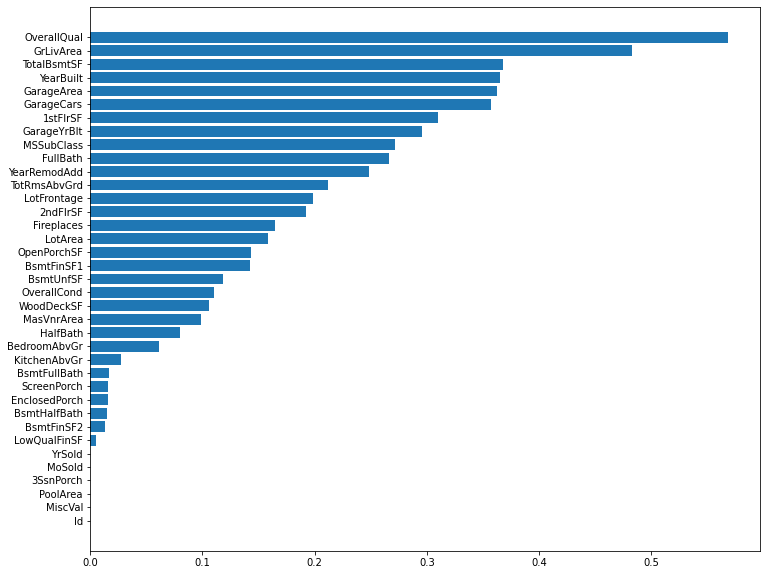

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Mutual information for target column y, for all the numerical columns
mutual_info_select = mutual_info_regression(numerical_columns, y)

# Create a dataframe for all column's mutual info and 
df2 = pd.DataFrame(mutual_info_select, index=list(numerical_columns.columns), columns=['info_score'])
df2.sort_values(by=['info_score'], ascending=True, inplace=True)

# Plot mutual information for all the columns for y
plt.figure(figsize=(12,10))
plt.barh(df2.index, df2['info_score'])

# Find the columns that have lower info score than set value
remove_index = []
print('Mutual information')
for i, row in df2.iterrows():
  if row['info_score'] < 0.1:
    print(i+':', row['info_score'])
    remove_index.append(i)

print('/n---------------------------------------/n')

print('Total Features Before: ', len(data.columns))
print('Features to be removed: ', remove_index)

# Remove columns found above
data.drop(remove_index, axis=1, inplace=True)

print('Numerical Features After : ', len(data.columns))

print('/n---------------------------------------/n')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif

categorical_columns = data.select_dtypes(exclude=['int64', 'float64'])

categorical_columns.isnull().sum()
categorical_columns.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)

cat_enc = OrdinalEncoder()
ordinal_cat_cols = cat_enc.fit_transform(categorical_columns)

cat_enc.get_params().keys()

np.isnan(ordinal_cat_cols).any()

ord_cat_df = pd.DataFrame(ordinal_cat_cols, columns = categorical_columns.columns)
ord_cat_df.fillna(-1, inplace=True)
ord_cat_df.isnull().sum()

select_columns = SelectKBest(score_func=f_classif, k=15)

class_cat_columns = select_columns.fit_transform(ord_cat_df, y)
best_cat_features = categorical_columns.columns[select_columns.get_support()]

categorical_columns.drop(best_cat_features, axis=1, inplace=True)
data.drop(categorical_columns.columns, axis=1, inplace=True)

data.shape

select_columns.get_support()


type(class_cat_columns)


(1460, 39)